In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [3]:
# reading csv files to pandas data frames
train_data = pd.DataFrame(pd.read_csv('./input/train.csv'))
test_data = pd.DataFrame(pd.read_csv('./input/test.csv'))
data = [train_data, test_data]

In [4]:
for set in data:
    # checking for missing values
    m_values = set.isnull().sum()
    if m_values.sum()==0:
        print ('No missing values found in dataset.')
    else:
        for i in range(len(m_values)):
            if m_values.data[i] != 0:
                print ('Column {} has {} missing values'.format(m_values.index[i], m_values.data[i]))


No missing values found in dataset.
No missing values found in dataset.


<bound method Figure.tight_layout of <Figure size 432x288 with 1 Axes>>

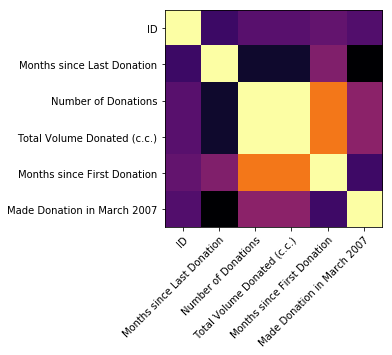

In [5]:
# plotting the correlation matrix
corr = train_data.corr()
frame, heatmap = plt.subplots()
# adding correlation data
heatmap.imshow(corr, cmap='inferno')
# setting x,y axes ticks
heatmap.set_xticks(np.arange(train_data.columns.size))
heatmap.set_yticks(np.arange(train_data.columns.size))
# setting x.y axes labels
heatmap.set_xticklabels(train_data.columns)
heatmap.set_yticklabels(train_data.columns)
# rotating x axes labels by 45 degrees for convenience
plt.setp(heatmap.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# tight layout
frame.tight_layout
# plotting the heat map
# plt.show()


In [6]:
# dropping Total Volume Donated (c.c.) column as it shows the strongest linear relationship with Number of Donations
train_data.drop(columns=['Total Volume Donated (c.c.)'], inplace=True)
test_data.drop(columns=['Total Volume Donated (c.c.)'], inplace=True)

In [7]:
# adding 'Days since First Donation' and 'Days since Last Donation' features
train_data = train_data.rename({'Months since Last Donation':'Days since Last Donation'}, axis='columns')
train_data = train_data.rename({'Months since First Donation':'Days since First Donation'}, axis='columns')

train_data['Days since First Donation'] = train_data['Days since First Donation'].apply(lambda x: x*30)
train_data['Days since Last Donation'] = train_data['Days since Last Donation'].apply(lambda x: x*30)

In [8]:

# calculate the mean time period between two donations in days
mean_wait = np.mean((train_data['Days since First Donation'] - train_data['Days since Last Donation'])/train_data['Number of Donations'])


In [12]:
# add donation eligibility. True if Days since last donation > 60, False otherwise.
eligibility_vector = pd.DataFrame(np.array(train_data['Days since First Donation'] > 60).T,columns=['Donation Eligiblity'])


In [14]:
# add donation likelihood
likelihood_vector = pd.DataFrame(np.array(((train_data['Days since First Donation'] - train_data['Days since Last Donation'])/train_data['Number of Donations']) > mean_wait).T, columns=['Donation Likelihood'])


In [17]:
# add new vectors to the original dataset
train_data = pd.concat([pd.concat([train_data, eligibility_vector], axis=1), likelihood_vector], axis=1)


In [18]:
train_data.to_csv('processed_input/train.csv')
test_data.to_csv('processed_input/test.csv')